In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [1]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.3, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    lut_in = np.array([0, 93, 140, 255])
    lut_out = np.array([150, 50, 40, 40])
    lut_8u = np.interp(np.arange(0, 256), lut_in, lut_out).astype(np.uint8)

    thresh = cv2.LUT(thresh, lut_8u)
    ret, thresh = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    thresh = cv2.bitwise_not(thresh)
    return thresh

def enhance_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    enhanced_image = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
    return enhanced_image

def find_blobs(image_path, contour_array, debug=False, blobs_are_black=False):
    image = cv2.imread(image_path)
    if blobs_are_black == False:
        image = cv2.bitwise_not(image)
    enhanced_image = enhance_image(image)    
    kernel = np.ones((2, 2), np.uint8)
    ed = cv2.erode(enhanced_image, kernel, iterations=1)
    thresh = sharpen(ed)
    
    cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
    cnts = [cnts[i] for i in range(len(cnts)) if hierarchy[0][i][2] == -1]
    for c in cnts:
        area = cv2.contourArea(c)
        cv2.drawContours(enhanced_image, [c], -1, (0,0,255), cv2.FILLED)
        contour_array.append(c)
        
    if debug:
        plt.imshow(enhanced_image, cmap="binary")
        plt.title(f'Detected Contours with Cell Count: {len(contour_array)}')
        plt.show()

frame_directory = r"C:\Users\Jerry Zhou\Video_frames"
frame_files = sorted(os.listdir(frame_directory))
total = 0
all_contours = []
frame_height = 0
frame_width = 0

for index, frame_file in enumerate(frame_files):
    frame_path = os.path.join(frame_directory, frame_file)
    frame = cv2.imread(frame_path)
    
    # Extract the dimensions of the frame (only if it hasn't been done before)
    if frame_height == 0 and frame_width == 0:
        frame_height, frame_width, _ = frame.shape
    
    find_blobs(frame_path, all_contours, debug=False, blobs_are_black=False)
    total += len(all_contours)
    progress_percent = (index + 1) / len(frame_files) * 100
    print(f"Processing frames: {progress_percent:.2f}%")

Processing frames: 0.10%
Processing frames: 0.20%
Processing frames: 0.30%
Processing frames: 0.40%
Processing frames: 0.50%
Processing frames: 0.60%
Processing frames: 0.70%
Processing frames: 0.80%
Processing frames: 0.90%
Processing frames: 1.00%
Processing frames: 1.10%
Processing frames: 1.20%
Processing frames: 1.30%
Processing frames: 1.40%
Processing frames: 1.50%
Processing frames: 1.60%
Processing frames: 1.70%
Processing frames: 1.80%
Processing frames: 1.90%
Processing frames: 2.00%
Processing frames: 2.10%
Processing frames: 2.20%
Processing frames: 2.30%
Processing frames: 2.40%
Processing frames: 2.51%
Processing frames: 2.61%
Processing frames: 2.71%
Processing frames: 2.81%
Processing frames: 2.91%
Processing frames: 3.01%
Processing frames: 3.11%
Processing frames: 3.21%
Processing frames: 3.31%
Processing frames: 3.41%
Processing frames: 3.51%
Processing frames: 3.61%
Processing frames: 3.71%
Processing frames: 3.81%
Processing frames: 3.91%
Processing frames: 4.01%


Processing frames: 32.26%
Processing frames: 32.36%
Processing frames: 32.46%
Processing frames: 32.57%
Processing frames: 32.67%
Processing frames: 32.77%
Processing frames: 32.87%
Processing frames: 32.97%
Processing frames: 33.07%
Processing frames: 33.17%
Processing frames: 33.27%
Processing frames: 33.37%
Processing frames: 33.47%
Processing frames: 33.57%
Processing frames: 33.67%
Processing frames: 33.77%
Processing frames: 33.87%
Processing frames: 33.97%
Processing frames: 34.07%
Processing frames: 34.17%
Processing frames: 34.27%
Processing frames: 34.37%
Processing frames: 34.47%
Processing frames: 34.57%
Processing frames: 34.67%
Processing frames: 34.77%
Processing frames: 34.87%
Processing frames: 34.97%
Processing frames: 35.07%
Processing frames: 35.17%
Processing frames: 35.27%
Processing frames: 35.37%
Processing frames: 35.47%
Processing frames: 35.57%
Processing frames: 35.67%
Processing frames: 35.77%
Processing frames: 35.87%
Processing frames: 35.97%
Processing f

Processing frames: 64.13%
Processing frames: 64.23%
Processing frames: 64.33%
Processing frames: 64.43%
Processing frames: 64.53%
Processing frames: 64.63%
Processing frames: 64.73%
Processing frames: 64.83%
Processing frames: 64.93%
Processing frames: 65.03%
Processing frames: 65.13%
Processing frames: 65.23%
Processing frames: 65.33%
Processing frames: 65.43%
Processing frames: 65.53%
Processing frames: 65.63%
Processing frames: 65.73%
Processing frames: 65.83%
Processing frames: 65.93%
Processing frames: 66.03%
Processing frames: 66.13%
Processing frames: 66.23%
Processing frames: 66.33%
Processing frames: 66.43%
Processing frames: 66.53%
Processing frames: 66.63%
Processing frames: 66.73%
Processing frames: 66.83%
Processing frames: 66.93%
Processing frames: 67.03%
Processing frames: 67.13%
Processing frames: 67.23%
Processing frames: 67.33%
Processing frames: 67.43%
Processing frames: 67.54%
Processing frames: 67.64%
Processing frames: 67.74%
Processing frames: 67.84%
Processing f

Processing frames: 95.99%
Processing frames: 96.09%
Processing frames: 96.19%
Processing frames: 96.29%
Processing frames: 96.39%
Processing frames: 96.49%
Processing frames: 96.59%
Processing frames: 96.69%
Processing frames: 96.79%
Processing frames: 96.89%
Processing frames: 96.99%
Processing frames: 97.09%
Processing frames: 97.19%
Processing frames: 97.29%
Processing frames: 97.39%
Processing frames: 97.49%
Processing frames: 97.60%
Processing frames: 97.70%
Processing frames: 97.80%
Processing frames: 97.90%
Processing frames: 98.00%
Processing frames: 98.10%
Processing frames: 98.20%
Processing frames: 98.30%
Processing frames: 98.40%
Processing frames: 98.50%
Processing frames: 98.60%
Processing frames: 98.70%
Processing frames: 98.80%
Processing frames: 98.90%
Processing frames: 99.00%
Processing frames: 99.10%
Processing frames: 99.20%
Processing frames: 99.30%
Processing frames: 99.40%
Processing frames: 99.50%
Processing frames: 99.60%
Processing frames: 99.70%
Processing f

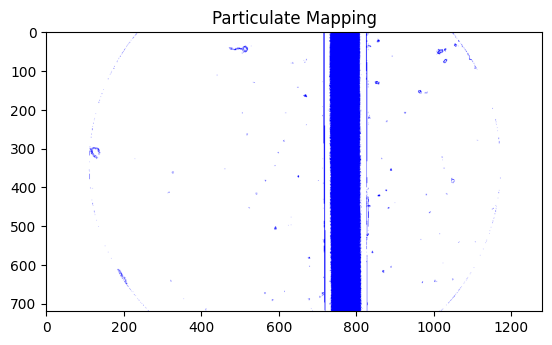

In [2]:
blank_frame = np.full((frame_height, frame_width, 3), 255, dtype=np.uint8)
for contour in all_contours:
    cv2.drawContours(blank_frame, [contour], -1, (0, 0, 255), cv2.FILLED)

output_directory = r"C:\Users\Jerry Zhou\Output_Image"
os.makedirs(output_directory, exist_ok=True)

output_path = os.path.join(output_directory, "blank_frame.png")
cv2.imwrite(output_path, blank_frame)

plt.imshow(blank_frame)
plt.title("Particulate Mapping")
plt.axis("on")
plt.show()

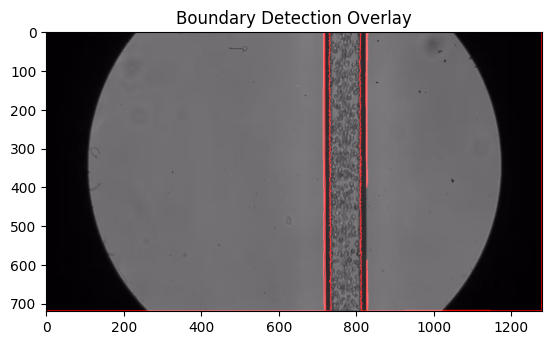

In [3]:
def detect_contours(image_path, approx_method=cv2.CHAIN_APPROX_TC89_L1):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, approx_method)

    contour_frame = np.zeros_like(image)
    cv2.drawContours(contour_frame, contours, -1, (0, 0, 255), 2)
    return contour_frame, contours

image_path = r"C:\Users\Jerry Zhou\Output_Image\blank_frame.png"
result_frame, contour_list = detect_contours(image_path)
result_frame_rgb = cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB)

second_image_path = r"C:\Users\Jerry Zhou\Video_frames\frame_1.jpg"
second_image = cv2.imread(second_image_path)
second_image_rgb = cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB)

combined_image = cv2.addWeighted(second_image_rgb, 1, result_frame_rgb, 1, 0)

plt.imshow(combined_image)
plt.title("Boundary Detection Overlay")
plt.axis("on")  
plt.show()

In [4]:
def remove_duplicate_points(contours):
    cleaned_contours = []

    for contour in contours:
        unique_points_set = set()
        cleaned_contour = []

        for point in contour:
            point_tuple = tuple(point[0])  # Convert point array to a tuple for set comparison
            if point_tuple not in unique_points_set:
                unique_points_set.add(point_tuple)
                cleaned_contour.append(point)

        cleaned_contours.append(cleaned_contour)

    return cleaned_contours
def extract_points_from_contours(contour_list):
    points_list = []
    for contour in contour_list:
        for point in contour:
            x, y = point[0]
            points_list.append((x, y))
    return points_list
new_points = remove_duplicate_points(contour_list)
points_to_use = extract_points_from_contours(new_points)

In [5]:
unique_y_values = set()
for x, y in points_to_use:
    unique_y_values.add(y)

unique_y_values_list = list(unique_y_values)
y_value_points = {}

for y_value in unique_y_values_list:
    points_with_y_value = [point for point in points_to_use if point[1] == y_value]
    sorted_points = sorted(points_with_y_value, key=lambda p: p[0])  # Sort based on x-coordinate
    y_value_points[y_value] = sorted_points

for y_value, points in y_value_points.items():
    print(f"Y-Value: {y_value}, Points: {points}")

Y-Value: 0, Points: [(0, 0), (716, 0), (719, 0), (731, 0), (809, 0), (825, 0), (828, 0), (830, 0), (832, 0), (1279, 0)]
Y-Value: 2, Points: [(716, 2), (825, 2)]
Y-Value: 3, Points: [(731, 3)]
Y-Value: 4, Points: [(828, 4)]
Y-Value: 5, Points: [(731, 5)]
Y-Value: 6, Points: [(733, 6), (826, 6)]
Y-Value: 7, Points: [(831, 7)]
Y-Value: 8, Points: [(730, 8), (811, 8)]
Y-Value: 9, Points: [(732, 9)]
Y-Value: 11, Points: [(731, 11), (829, 11)]
Y-Value: 15, Points: [(732, 15)]
Y-Value: 16, Points: [(730, 16), (811, 16)]
Y-Value: 17, Points: [(732, 17)]
Y-Value: 20, Points: [(811, 20)]
Y-Value: 23, Points: [(732, 23), (811, 23), (828, 23)]
Y-Value: 24, Points: [(730, 24), (829, 24)]
Y-Value: 26, Points: [(730, 26)]
Y-Value: 27, Points: [(732, 27), (829, 27)]
Y-Value: 29, Points: [(811, 29)]
Y-Value: 30, Points: [(733, 30)]
Y-Value: 33, Points: [(731, 33)]
Y-Value: 35, Points: [(811, 35), (828, 35)]
Y-Value: 36, Points: [(731, 36), (826, 36), (829, 36)]
Y-Value: 39, Points: [(732, 39)]
Y-Value:

In [6]:
y_value_points = {}
for y_value in unique_y_values_list:
    points_with_y_value = [point for point in points_to_use if point[1] == y_value]
    sorted_points = sorted(points_with_y_value, key=lambda p: p[0])  # Sort based on x-coordinate
    y_value_points[y_value] = sorted_points

largest_difference_points_list = []

for y_value, points in y_value_points.items():
    largest_difference_points = None
    largest_difference = 0

    for i in range(len(points) - 1):
        x1, y1 = points[i]
        x2, y2 = points[i + 1]
        difference = abs(x2 - x1)

        if difference > largest_difference:
            largest_difference = difference
            largest_difference_points = (x1, y1), (x2, y2)

    if largest_difference_points:
        largest_difference_points_list.append(largest_difference_points)
    print(f"Y-Value: {y_value}, Points: {largest_difference_points}")

largest_difference_points_array = np.array(largest_difference_points_list)

Y-Value: 0, Points: ((0, 0), (716, 0))
Y-Value: 2, Points: ((716, 2), (825, 2))
Y-Value: 3, Points: None
Y-Value: 4, Points: None
Y-Value: 5, Points: None
Y-Value: 6, Points: ((733, 6), (826, 6))
Y-Value: 7, Points: None
Y-Value: 8, Points: ((730, 8), (811, 8))
Y-Value: 9, Points: None
Y-Value: 11, Points: ((731, 11), (829, 11))
Y-Value: 15, Points: None
Y-Value: 16, Points: ((730, 16), (811, 16))
Y-Value: 17, Points: None
Y-Value: 20, Points: None
Y-Value: 23, Points: ((732, 23), (811, 23))
Y-Value: 24, Points: ((730, 24), (829, 24))
Y-Value: 26, Points: None
Y-Value: 27, Points: ((732, 27), (829, 27))
Y-Value: 29, Points: None
Y-Value: 30, Points: None
Y-Value: 33, Points: None
Y-Value: 35, Points: ((811, 35), (828, 35))
Y-Value: 36, Points: ((731, 36), (826, 36))
Y-Value: 39, Points: None
Y-Value: 40, Points: None
Y-Value: 41, Points: None
Y-Value: 42, Points: None
Y-Value: 43, Points: None
Y-Value: 45, Points: ((732, 45), (811, 45))
Y-Value: 47, Points: None
Y-Value: 49, Points: No

In [7]:
flattened_list = largest_difference_points_array.flatten().tolist()
largest_difference_points_array

array([[[  0,   0],
        [716,   0]],

       [[716,   2],
        [825,   2]],

       [[733,   6],
        [826,   6]],

       [[730,   8],
        [811,   8]],

       [[731,  11],
        [829,  11]],

       [[730,  16],
        [811,  16]],

       [[732,  23],
        [811,  23]],

       [[730,  24],
        [829,  24]],

       [[732,  27],
        [829,  27]],

       [[811,  35],
        [828,  35]],

       [[731,  36],
        [826,  36]],

       [[732,  45],
        [811,  45]],

       [[731,  60],
        [810,  60]],

       [[732,  63],
        [810,  63]],

       [[730,  64],
        [812,  64]],

       [[733,  79],
        [828,  79]],

       [[731, 103],
        [826, 103]],

       [[732, 109],
        [825, 109]],

       [[730, 115],
        [809, 115]],

       [[730, 118],
        [825, 118]],

       [[732, 119],
        [810, 119]],

       [[812, 120],
        [826, 120]],

       [[732, 121],
        [809, 121]],

       [[731, 127],
        [733, 

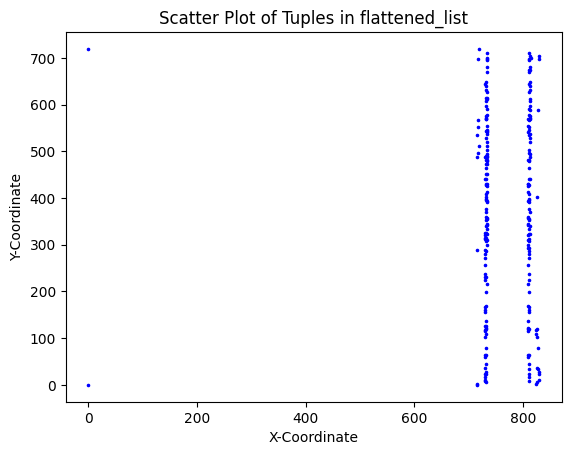

In [8]:
x_values = flattened_list[::2]  # Get every second element starting from index 0
y_values = flattened_list[1::2]  # Get every second element starting from index 1
plt.scatter(x_values, y_values, marker='.', color='blue', s = 10)
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.title("Scatter Plot of Tuples in flattened_list")
plt.show()

Data as (x-coordinate, its counts) tuples:
[(734, 27), (733, 26), (812, 24), (811, 24), (732, 22), (810, 22), (731, 22), (813, 17), (735, 13), (730, 6), (814, 5), (717, 4), (826, 4), (716, 4), (809, 4), (825, 3), (829, 3), (828, 3), (830, 2), (0, 2), (720, 1), (719, 1), (815, 1), (827, 1), (715, 1)]


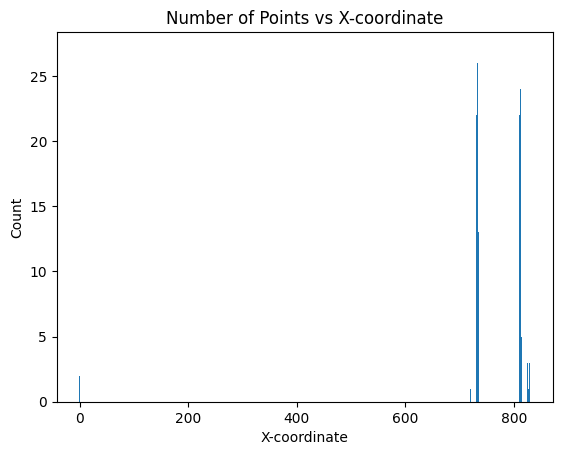

In [9]:
unique_x, counts = np.unique(x_values, return_counts=True)
sorted_indices = np.argsort(counts)[::-1]
sorted_unique_x = unique_x[sorted_indices]
sorted_counts = counts[sorted_indices]

largest_difference_points_list = list(zip(sorted_unique_x, sorted_counts))
print("Data as (x-coordinate, its counts) tuples:")
print(largest_difference_points_list)

plt.bar(unique_x, counts)
plt.xlabel('X-coordinate')
plt.ylabel('Count')
plt.title('Number of Points vs X-coordinate')
plt.show()

In [10]:
sorted_largest_difference_points = sorted(largest_difference_points_list, key=lambda item: item[0])

print("Sorted tuples in ascending x-coordinate order:")
print(sorted_largest_difference_points)


Sorted tuples in ascending x-coordinate order:
[(0, 2), (715, 1), (716, 4), (717, 4), (719, 1), (720, 1), (730, 6), (731, 22), (732, 22), (733, 26), (734, 27), (735, 13), (809, 4), (810, 22), (811, 24), (812, 24), (813, 17), (814, 5), (815, 1), (825, 3), (826, 4), (827, 1), (828, 3), (829, 3), (830, 2)]


In [11]:
def find_clusters(points_list, max_distance=2):
    sorted_points = sorted(points_list)
    clusters = []
    current_cluster = []

    for i in range(len(sorted_points)):
        if not current_cluster:
            current_cluster.append(sorted_points[i])
        else:
            prev_point = current_cluster[-1]
            distance = abs(sorted_points[i] - prev_point)

            if distance <= max_distance:
                current_cluster.append(sorted_points[i])
            else:
                if len(current_cluster) >= 1:
                    clusters.append(current_cluster)
                current_cluster = [sorted_points[i]]

    if len(current_cluster) >= 1:
        clusters.append(current_cluster)

    return clusters

def find_clusters_with_counts(points_list, clusters):
    cluster_counts = []
    for cluster in clusters:
        count = sum(point[1] for point in points_list if point[0] in cluster)
        cluster_counts.append(count)

    sorted_clusters_with_counts = sorted(zip(clusters, [sum(point[1] for point in points_list if point[0] in cluster) for cluster in clusters]), key=lambda x: x[1], reverse=True)
    top_two_clusters = sorted_clusters_with_counts[:2]

    return [cluster for cluster, _ in top_two_clusters]
 
x_values = [point[0] for point in largest_difference_points_list]
clusters = find_clusters(x_values, max_distance=1)

top_two_clusters = find_clusters_with_counts(largest_difference_points_list, clusters)
top_two_clusters

[[730, 731, 732, 733, 734, 735], [809, 810, 811, 812, 813, 814, 815]]

In [12]:
cluster1_x = []
cluster2_x = []

for cluster in top_two_clusters:
    if cluster == top_two_clusters[0]:  
        cluster1_x.extend(cluster)
    elif cluster == top_two_clusters[1]:  
        cluster2_x.extend(cluster)

print("Cluster 1 x-coordinates:", cluster1_x)
print("Cluster 2 x-coordinates:", cluster2_x)


Cluster 1 x-coordinates: [730, 731, 732, 733, 734, 735]
Cluster 2 x-coordinates: [809, 810, 811, 812, 813, 814, 815]


In [13]:
matching_indices = np.where(np.isin(unique_x, cluster1_x))
unique_x_cluster1 = unique_x[matching_indices]
counts_cluster1 = counts[matching_indices]

largest_difference_points_list_cluster1 = list(zip(unique_x_cluster1, counts_cluster1))
x_with_largest_count = unique_x_cluster1[np.argmax(counts_cluster1)]
largest_count = np.max(counts_cluster1)

print("X-coordinate with the largest count in cluster1_x:", x_with_largest_count)
print("Largest count:", largest_count)
print("Data as (x-coordinate, its counts) tuples for cluster1_x:")
print(largest_difference_points_list_cluster1)


X-coordinate with the largest count in cluster1_x: 734
Largest count: 27
Data as (x-coordinate, its counts) tuples for cluster1_x:
[(730, 6), (731, 22), (732, 22), (733, 26), (734, 27), (735, 13)]


In [14]:
matching_indices_cluster2 = np.where(np.isin(unique_x, cluster2_x))
unique_x_cluster2 = unique_x[matching_indices_cluster2]
counts_cluster2 = counts[matching_indices_cluster2]

largest_difference_points_list_cluster2 = list(zip(unique_x_cluster2, counts_cluster2))
x_with_largest_count_cluster2 = unique_x_cluster2[np.argmax(counts_cluster2)]
largest_count_cluster2 = np.max(counts_cluster2)

print("X-coordinate with the largest count in cluster2_x:", x_with_largest_count_cluster2)
print("Largest count in cluster2_x:", largest_count_cluster2)
print("Data as (x-coordinate, its counts) tuples for cluster2_x:")
print(largest_difference_points_list_cluster2)


X-coordinate with the largest count in cluster2_x: 811
Largest count in cluster2_x: 24
Data as (x-coordinate, its counts) tuples for cluster2_x:
[(809, 4), (810, 22), (811, 24), (812, 24), (813, 17), (814, 5), (815, 1)]


39
40


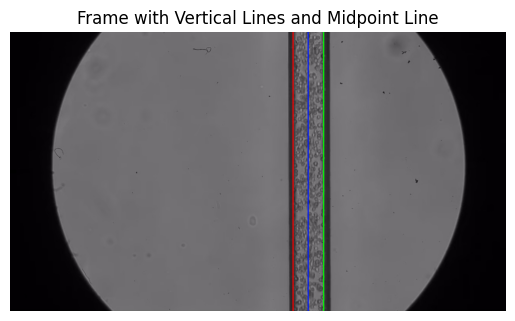

In [15]:
midpoint = int((cluster1_x[0] + cluster2_x[0]) / 2)
frame = cv2.imread(frame_path)

frame_height, frame_width, _ = frame.shape
midpoint_y = int(frame_height / 2)

line_color_cluster1 = (0, 0, 255) 
line_color_cluster2 = (0, 255, 0)  
line_color_midpoint = (255, 25, 0) 
line_thickness = 2  
cv2.line(frame, (cluster1_x[0], 0), (cluster1_x[0], frame_height - 1), line_color_cluster1, line_thickness)
cv2.line(frame, (cluster2_x[0], 0), (cluster2_x[0], frame_height - 1), line_color_cluster2, line_thickness)
cv2.line(frame, (midpoint, 0), (midpoint, frame_height - 1), line_color_midpoint, line_thickness)

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.title("Frame with Vertical Lines and Midpoint Line")
plt.axis("off")

output_directory = r"C:\Users\Jerry Zhou\50x50_dextran_EVID"
output_filename = "Video24.png"
output_path = os.path.join(output_directory, output_filename)
cv2.imwrite(output_path, frame_rgb)
print(abs(midpoint - cluster1_x[0]))
print(abs(midpoint - cluster2_x[0]))
plt.show()


In [16]:
def draw_horizontal_line(image_path):
    image = cv2.imread(image_path)
    image_copy = image.copy()
    start_point = None
    end_point = None

    def draw_line(event, x, y, flags, param):
        nonlocal start_point, end_point
        
        if event == cv2.EVENT_LBUTTONDOWN:
            start_point = (x, y)

        if event == cv2.EVENT_LBUTTONUP:
            end_point = (x, y)
            end_point = (end_point[0], start_point[1])
            cv2.line(image_copy, start_point, end_point, (0, 0, 255), 2)
            cv2.imshow("Draw Line", image_copy)

            length_pixels = abs(end_point[0] - start_point[0])
            print("Length of the Diameter (pixels):", length_pixels)
            print("Length of the Radius (pixels):", length_pixels/2)

    cv2.namedWindow("Draw Line")
    cv2.setMouseCallback("Draw Line", draw_line)
    cv2.imshow("Draw Line", image)
    cv2.waitKewy(0)
    cv2.destroyAllWindows()

image_path = r"C:\Users\Jerry Zhou\Video_frames\frame_1.jpg"
draw_horizontal_line(image_path)

Length of the Diameter (pixels): 74
Length of the Radius (pixels): 37.0
